Detected encoding for ground_truth: ascii
Detected encoding for submission: ascii
총 샘플 수: 3140
✅ 전체 정확도: 97.77%
❌ 전체 오답률: 2.23%


,total,correct,accuracy(%),error(%)
target_true,,,,
0,200,200,100.00,0.00
1,88,88,100.00,0.00
2,200,200,100.00,0.00
3,203,187,92.12,7.88
4,192,181,94.27,5.73
5,200,199,99.50,0.50
6,203,202,99.51,0.49
7,206,183,88.83,11.17
8,200,200,100.00,0.00


/tmp/ipykernel_1410849/3882014402.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_stats.index, y=class_stats["error(%)"], palette="Reds_r")
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53364 (\N

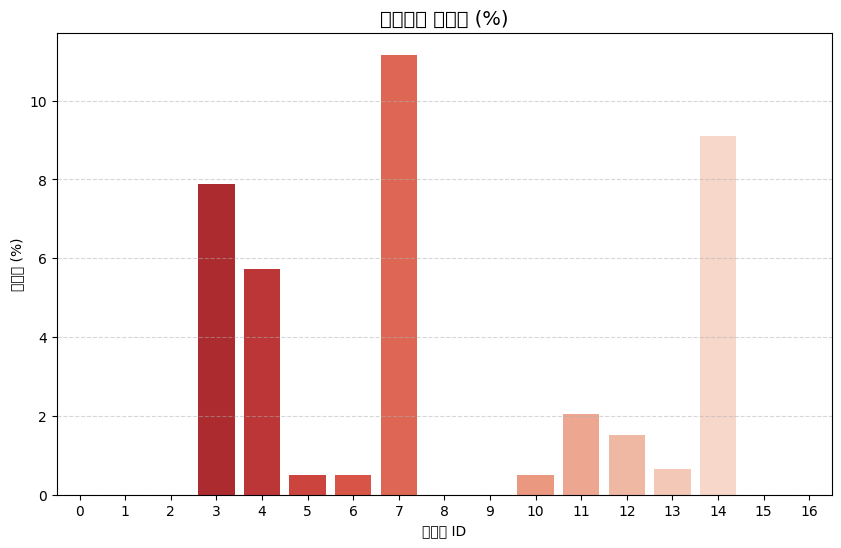

,ID,target_true,target_pred,correct
1,2956f79c00f1d8f4.jpg,13,0,False
70,06fb9852b074f191.jpg,3,7,False
188,106e817be539b3e7.jpg,3,7,False
252,15a24e3d9d781c17.jpg,7,3,False
253,15ca73556389df7e.jpg,7,3,False
502,2cab10f1deae738e.jpg,14,3,False
507,2d2e3fe1fec169d9.jpg,7,3,False
510,2d8895f44940baa7.jpg,12,11,False
539,2fdedea275ad1ff7.jpg,3,7,False
572,322373ff9187b892.jpg,4,14,False


In [ ]:
# =========================================================
# 🔹 1. 라이브러리 임포트
# =========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

# =========================================================
# 🔹 2. CSV 파일 불러오기
# =========================================================

gt_path = "gt.csv"
# pred_path = "output_9683.csv"
# pred_path = "output_9634.csv"
pred_path = "baseline/pred_1111_1707.csv"

# 🔍 파일 인코딩 자동 탐지
with open(gt_path, "rb") as f:
    result = chardet.detect(f.read(10000))
print("Detected encoding for ground_truth:", result["encoding"])

with open(pred_path, "rb") as f:
    result2 = chardet.detect(f.read(10000))
print("Detected encoding for submission:", result2["encoding"])

# ✅ 탐지된 인코딩을 이용해 CSV 읽기
gt = pd.read_csv(gt_path, encoding=result["encoding"])
pred = pd.read_csv(pred_path, encoding=result2["encoding"])

# 두 파일 모두 'ID', 'target' 컬럼을 포함해야 함
gt = pd.read_csv(gt_path)
pred = pd.read_csv(pred_path)

# =========================================================
# 🔹 3. ID 기준으로 병합
# =========================================================
merged = gt.merge(pred, on="ID", suffixes=("_true", "_pred"))
print(f"총 샘플 수: {len(merged)}")

# =========================================================
# 🔹 4. 전체 정확도 계산
# =========================================================
merged["correct"] = merged["target_true"] == merged["target_pred"]
acc = merged["correct"].mean() * 100
print(f"✅ 전체 정확도: {acc:.2f}%")
print(f"❌ 전체 오답률: {100 - acc:.2f}%")

# =========================================================
# 🔹 5. 클래스별 정답률/오답률 계산
# =========================================================
class_stats = (
    merged.groupby("target_true")["correct"]
    .agg(["count", "sum"])
    .rename(columns={"count": "total", "sum": "correct"})
)
class_stats["accuracy(%)"] = class_stats["correct"] / class_stats["total"] * 100
class_stats["error(%)"] = 100 - class_stats["accuracy(%)"]

display(class_stats.round(2))

# =========================================================
# 🔹 6. 시각화 (클래스별 오답률)
# =========================================================
plt.figure(figsize=(10, 6))
sns.barplot(x=class_stats.index, y=class_stats["error(%)"], palette="Reds_r")
plt.title("클래스별 오답률 (%)", fontsize=14)
plt.xlabel("클래스 ID")
plt.ylabel("오답률 (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# =========================================================
# 🔹 7. 오답 예시 확인 (원하면 주석 해제)
# =========================================================
misclassified = merged[~merged["correct"]]
display(misclassified.head(20))
